In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [80]:
def generate_plots(util_file, latency_file, outpath):
    # Read the files
    utils = pd.read_csv(util_file)
    utils['Sum'] = utils['C0'] + utils['C1']
    
    def get_utilization_within_range(row):
        return utils[(utils['Time'] > row.ts_start) & (utils['Time'] < row.ts_end)]['Sum'].mean()
    
    latencies = pd.read_csv(latency_file, 
                            delim_whitespace=True, 
                            skipfooter=2)
    latencies = latencies[['p95', 'QPS', 'target', 'ts_start', 'ts_end']]
    
    # Get average utilization during the bucket based on timestamps
    latencies['cpu'] = latencies.apply(get_utilization_within_range, axis=1)
    latencies['threshold'] = 2000
    
    # Plot the data
    sns.set(style='darkgrid', font_scale=1.4)
    fig, ax1 = plt.subplots(figsize=(14,10))
    ax2 = ax1.twinx()
    
    l1 = ax1.plot(latencies['QPS'], latencies['p95'], marker='o', color='#e74c3c', label='P95 Latency')
    l2 = ax1.plot(latencies['target'], latencies['threshold'], color='#666', linestyle='--', label='2ms SLO', linewidth=3)
    l3 = ax2.plot(latencies['QPS'], latencies['cpu'], marker='o', color='#3498db', label='CPU Utilization')
    
    lines = l1 + l2 + l3
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='lower right')
    
    ax1.xaxis.set_tick_params(labelsize='small')
    ax1.yaxis.set_tick_params(labelsize='small')
    ax2.yaxis.set_tick_params(labelsize='small')
    ax2.yaxis.grid(False)
    
    plt.xticks(range(0, 100001, 10000))    
    ax2.set_ylabel('Memcached Server CPU Utilization (%)')
    ax1.set_ylabel('p95 Latency (ms)')
    ax1.set_xlabel('QPS (#queries / sec)')
    
    ax1.set_ylim([0, 22100])
    ax2.set_ylim([0, 220])
    
    plt.title('Memcached Performance (T=2, C=2)')
    plt.savefig(outpath)

<ipython-input-80-a6cc40b0f57a>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  latencies = pd.read_csv(latency_file,


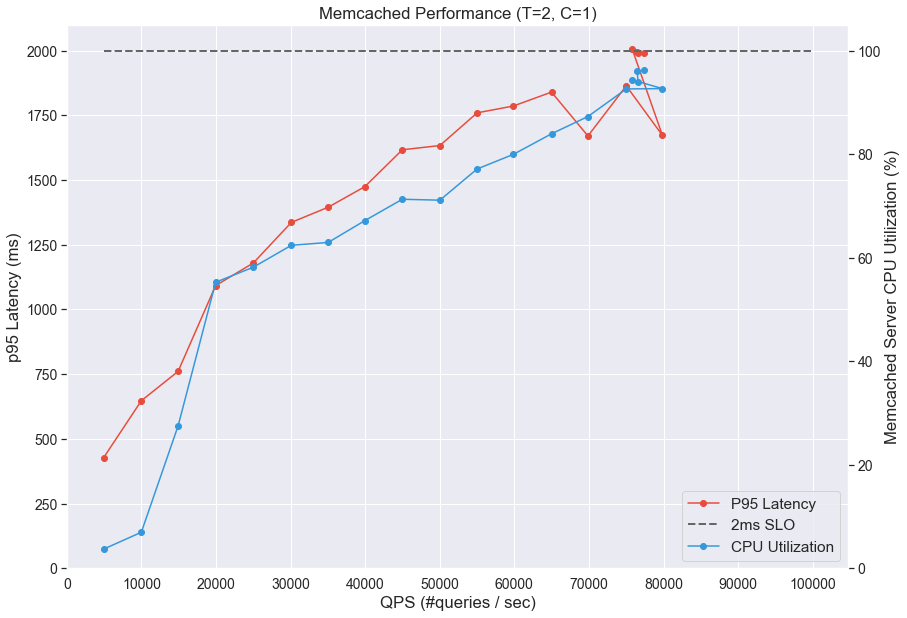

In [81]:
generate_plots('../results/question_4_2_2/t2c2_cpu.csv', 
               '../results/question_4_2_2/t2c2_latencies.raw', 
               '../results/question_4_2_2/c2_plot.png')